In [ ]:
#CopyRight By Vi Thành Long
#Github: https://github.com/Longdeptrai1107
#Facebook: https://www.facebook.com/longls025/
#Zalo: 0339571494
#email: logvi1107@gmail.com
#youtube: https://www.youtube.com/channel/UCRnJbtXwiYFYWAMPQKXR0Kg 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical,plot_model

# 1. Xử Lý Dữ Liệu

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()
num_classes = 10
shape = (28,28,1)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
y_train = to_categorical(y_train,num_classes = 10)
y_test = to_categorical(y_test,num_classes = 10)

11501568/11490434 [==============================] - 0s 0us/step


# 2. Tạo Model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dropout_1 (Dropout)         (None, 3136)             

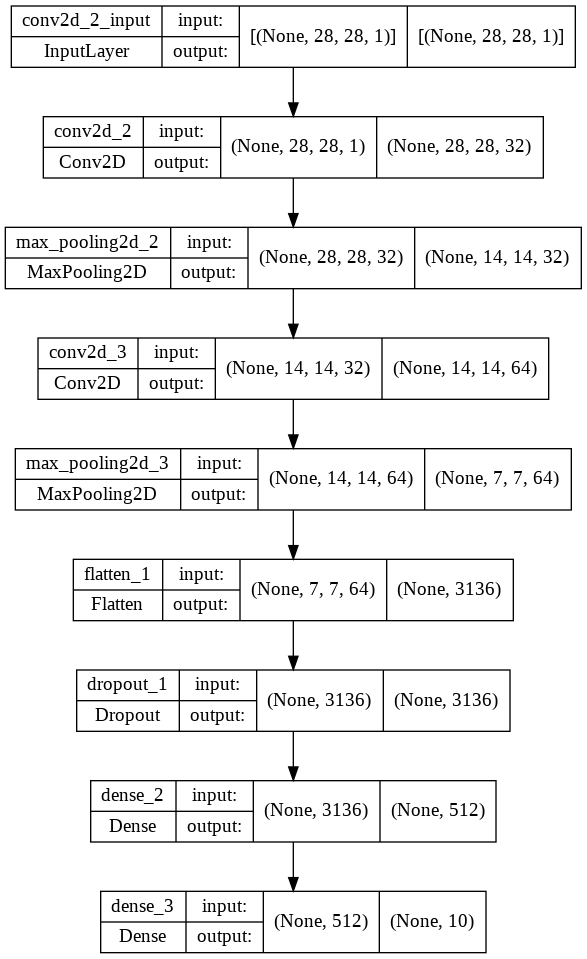

In [ ]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding='same',input_shape=shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# 3. Training

In [6]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.1372 - accuracy: 0.9576 - val_loss: 0.0445 - val_accuracy: 0.9853
Epoch 2/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0579 - accuracy: 0.9820 - val_loss: 0.0307 - val_accuracy: 0.9900
Epoch 3/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0422 - accuracy: 0.9863 - val_loss: 0.0248 - val_accuracy: 0.9913
Epoch 4/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0344 - accuracy: 0.9886 - val_loss: 0.0263 - val_accuracy: 0.9909
Epoch 5/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.0227 - val_accuracy: 0.9927
Epoch 6/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0252 - accuracy: 0.9916 - val_loss: 0.0304 - val_accuracy: 0.9909
Epoch 7/10
1875/1875 [==============================] - 111s 59ms/step - loss: 0.0210 - accuracy: 0.9930 - val_loss: 0

In [ ]:
plt.figure(figsize=(8,16))
df = pd.DataFrame(model.history.history)
df.plot()

TypeError: ignored

<Figure size 576x1152 with 0 Axes>

In [ ]:
model.save('mymodel.h5')

# 4. Dự Đoán

In [ ]:
save_model = load_model('mymodel.h5')

In [ ]:
save_model.evaluate(x_test,y_test,verbose=0)

[0.024314116686582565, 0.9922000169754028]

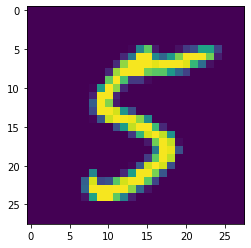

In [ ]:
plt.imshow(x_test[129])

In [ ]:
result = model.predict(x=x_test)

In [ ]:
giatri = np.argmax(result[129])

In [ ]:
giatri

5